# EWMPCA

In [1]:
if (!require("arrow")) {
    install.packages("arrow");
    library(arrow);
}


Loading required package: arrow


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
first_year = 2008; last_year = 2020;

# read the equity_indices
df = read_parquet('./data/equity_indices.parquet')

In [3]:
df = df[df$Datetime >= "2008-01-01" & df$Datetime <= "2020-12-31 23:59:59",];

In [4]:
head(df)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2231,0,0,0,0,0,0,0,0,0.0018232415,2008-01-01 14:00:00
2232,0,0,0,0,0,0,0,0,-0.0003831418,2008-01-01 15:00:00
2233,0,0,0,0,0,0,0,0,0.0006707551,2008-01-01 16:00:00
2234,0,0,0,0,0,0,0,0,-0.0008618213,2008-01-01 17:00:00
2235,0,0,0,0,0,0,0,0,-0.0018209699,2008-01-01 18:00:00
2236,0,0,0,0,0,0,0,0,-0.0012481997,2008-01-01 19:00:00


In [5]:
tail(df)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
81766,0,-0.0010771509,0.0002614949,0,0,-0.0035443728,-0.0003043677,0,0.0000331686,2020-12-31 06:00:00
81767,0,0.0014152851,0.0018299856,0,0,0.0017784900,0.0003044603,0,0.0011276949,2020-12-31 07:00:00
81768,0,-0.0003364964,-0.0006523725,0,0,-0.0007023294,-0.0006087354,0,-0.0003975616,2020-12-31 08:00:00
81769,0,0.0028948431,0.0021324745,0,0,0.0020303776,0.0018273184,0,0.0031154713,2020-12-31 09:00:00
81770,0,0.0028193596,-0.0021713641,0,0,0.0021821299,-0.0012159903,0,0.0029405934,2020-12-31 10:00:00
81771,0,0.0011379610,0.0027853941,0,0,0.0010303667,0.0020798458,0,0.0004612090,2020-12-31 11:00:00


In [6]:
Z = prcomp(df[,1:9], retx = TRUE)

In [7]:
classical_pca = Z$x;

In [8]:
head(classical_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
2231,0.0004218708,0.0005528499,9.158623e-05,-1.294391e-04,0.0007411066,-2.010741e-04,0.0008864193,0.0005319342,-0.0010451609
2232,-0.0001537578,-0.0001379960,-2.403844e-05,2.731519e-05,-0.0001632364,4.058322e-05,-0.0001762440,-0.0001094920,0.0002215886
2233,0.0001211958,0.0001919921,3.119062e-05,-4.755978e-05,0.0002687304,-7.484637e-05,0.0003313457,0.0001968904,-0.0003834845
2234,-0.0002786417,-0.0002878765,-4.912345e-05,6.132338e-05,-0.0003594355,9.301129e-05,-0.0004067911,-0.0002486508,0.0004964126
2235,-0.0005288763,-0.0005881978,-9.938727e-05,1.294669e-04,-0.0007525673,1.980634e-04,-0.0008687472,-0.0005274886,0.0010470879
2236,-0.0003794449,-0.0004088564,-6.937146e-05,8.877395e-05,-0.0005178027,1.353299e-04,-0.0005928831,-0.0003609764,0.0007182438


In [9]:
source("xpca.R")

In [10]:
minLimit = min(dim(df)[1], 100);
cov_init = cov(df[1:minLimit,1:9]);
W_init = sorted_eig(cov_init);

[1] "eigen values:"
[1] -4.235165e-22  2.354068e-07  4.914251e-07  1.022780e-06  1.291535e-06
[6]  3.404366e-06  5.071879e-06  1.660871e-05  7.202036e-05
[1] "eigen vectors:"
            [,1]        [,2]          [,3]          [,4]          [,5]
 [1,] -0.1996741  0.07645926  1.983089e-01  4.841814e-01 -8.637406e-02
 [2,] -0.3372554  0.09022704 -3.775480e-01 -3.033985e-04 -2.638490e-01
 [3,] -0.3914986  0.03247891 -2.835584e-01 -3.244092e-01 -5.313739e-02
 [4,] -0.3387562  0.13546927  1.213399e-01  6.766690e-01  2.715568e-01
 [5,]  0.0000000  0.00000000 -1.110223e-16  5.551115e-17 -7.216450e-16
 [6,] -0.3999386  0.10536006 -3.932606e-01 -1.255838e-01  6.302252e-01
 [7,] -0.3330048 -0.92770945  1.511169e-01 -5.444671e-03  6.989420e-03
 [8,] -0.4449276  0.29172639  7.193356e-01 -4.161549e-01  5.571709e-03
 [9,] -0.3309962  0.09877456 -1.675363e-01  1.160182e-01 -6.701439e-01
               [,6]          [,7]          [,8]          [,9]
 [1,]  1.639014e-01  7.857331e-01 -1.697808e-01  0.00

In [11]:
W_init

-0.1996741,0.07645926,1.983089e-01,4.841814e-01,-8.637406e-02,1.639014e-01,7.857331e-01,-1.697808e-01,0.000000e+00
-0.3372554,0.09022704,-3.775480e-01,-3.033985e-04,-2.638490e-01,-5.766015e-02,-1.871674e-01,-7.922138e-01,1.177048e-16
-0.3914986,0.03247891,-2.835584e-01,-3.244092e-01,-5.313739e-02,7.677593e-01,5.767403e-02,2.538169e-01,-8.991416e-16
-0.3387562,0.13546927,1.213399e-01,6.766690e-01,2.715568e-01,1.699031e-01,-5.258815e-01,1.229903e-01,-5.227561e-16
0.0000000,0.00000000,-1.110223e-16,5.551115e-17,-7.216450e-16,-8.881784e-16,1.526557e-16,5.551115e-17,-1.000000e+00
-0.3999386,0.10536006,-3.932606e-01,-1.255838e-01,6.302252e-01,-4.254085e-01,2.511750e-01,1.314464e-01,4.407229e-17
-0.3330048,-0.92770945,1.511169e-01,-5.444671e-03,6.989420e-03,-6.556450e-02,-2.085652e-02,-2.853914e-02,7.987552e-17
-0.4449276,0.29172639,7.193356e-01,-4.161549e-01,5.571709e-03,-1.115874e-01,-6.398850e-02,-9.863625e-02,1.009390e-16
-0.3309962,0.09877456,-1.675363e-01,1.160182e-01,-6.701439e-01,-3.921319e-01,-9.788791e-03,4.860045e-01,1.209388e-15


In [28]:
ewm_pca = ewmpca(df[,1:9], 0.9305, W_init);

In [29]:
dim(ewm_pca);

[1] 79541     9

In [30]:
head(ewm_pca, 100);

0.0000000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000000,0.000000e+00,0.000000e+00,0.000000e+00
0.0013758320,-9.977866e-04,8.050623e-04,6.795483e-04,3.439586e-04,-0.0002381899,-2.027881e-04,2.009678e-05,-2.147276e-18
0.0006230344,-4.518396e-04,3.645659e-04,3.077280e-04,1.557589e-04,-0.0001078624,-9.183095e-05,9.100662e-06,-9.723765e-19
0.0015354005,-1.113509e-03,8.984331e-04,7.583621e-04,3.838508e-04,-0.0002658151,-2.263074e-04,2.242759e-05,-2.396316e-18
0.0020267854,-1.469874e-03,1.185965e-03,1.001066e-03,5.066972e-04,-0.0003508858,-2.987341e-04,2.960525e-05,-3.163226e-18
0.0015287621,-1.108695e-03,8.945487e-04,7.550833e-04,3.821912e-04,-0.0002646659,-2.253289e-04,2.233063e-05,-2.385955e-18
0.0023226912,-1.684472e-03,1.359113e-03,1.147219e-03,5.806738e-04,-0.0004021143,-3.423486e-04,3.392755e-05,-3.625049e-18
0.0002404763,-3.090285e-03,-1.116454e-04,1.631159e-03,-5.704240e-04,-0.0013897623,-7.590879e-04,-6.142191e-04,8.154445e-20
-0.0093932701,8.877654e-03,4.828314e-03,-2.352782e-03,2.184005e-03,0.0009285880,-1.348202e-03,1.143622e-03,3.330833e-18
0.0039411382,-2.955965e-03,-1.849638e-03,-3.030289e-03,5.319125e-04,-0.0006160101,-3.187795e-05,-1.582226e-04,-4.770958e-19
-0.0007307851,1.292749e-03,5.121735e-04,-1.261170e-03,-2.580109e-04,-0.0001321662,-4.248217e-04,1.205438e-05,5.386426e-19


In [31]:
dim(ewm_pca)

[1] 79541     9

In [32]:
tail(ewm_pca)

"[79536,]",0.0003920774,-0.0008641524,0.0009090846,2.596785e-03,-0.0016428873,-6.027025e-04,-0.0005177813,-0.0005889069,-1.815113e-05
"[79537,]",-0.0017439116,-0.0004975010,-0.0009923637,-1.786344e-03,0.0001906723,1.726466e-04,0.0005689931,0.0006957746,-1.248271e-03
"[79538,]",0.0009452266,-0.0003424544,0.0006490466,8.241368e-05,-0.0002277207,-2.517880e-04,-0.0004037244,-0.0002016141,2.588908e-04
"[79539,]",-0.0036961742,-0.0010124849,-0.0010626936,-1.680531e-03,0.0022148116,6.407987e-04,-0.0003792359,-0.0014778326,6.275507e-04
"[79540,]",0.0011223838,-0.0016580279,-0.0029055916,-3.840988e-05,0.0028408105,1.242682e-03,-0.0009620184,-0.0009502281,1.928470e-04
"[79541,]",-0.0031847647,0.0002391051,-0.0002274676,-5.358926e-04,-0.0003773231,1.876878e-06,0.0001764393,-0.0003018692,5.546126e-04


In [33]:
cross_cov = cov(cbind(classical_pca, ewm_pca))

In [34]:
cross_cov

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,,,,,,,,,
PC1,1.150491e-04,8.023806e-18,-8.145720e-18,-2.319919e-17,-8.249524e-18,-8.262600e-19,1.638103e-17,-2.850628e-17,-3.068278e-18,-1.070240e-04,-4.541138e-07,9.439344e-07,1.256016e-06,9.353449e-07,6.834788e-07,6.007011e-07,4.572574e-07,2.368018e-07
PC2,8.023806e-18,1.741281e-05,1.165337e-18,1.658429e-18,6.800568e-19,-2.604136e-20,-1.507314e-18,2.795220e-18,-2.965472e-19,-1.447819e-06,5.899165e-06,-1.841101e-07,-1.064559e-06,-7.812660e-07,-7.540079e-07,-4.971986e-07,-3.618552e-07,-8.327308e-08
PC3,-8.145720e-18,1.165337e-18,7.861264e-06,-1.068056e-19,-7.925724e-20,-6.565167e-20,6.551738e-19,-1.163602e-18,-7.134772e-20,-4.075304e-07,-1.034938e-06,-7.273422e-08,-2.342856e-07,2.137069e-09,2.180583e-07,1.569380e-07,1.754013e-07,7.505127e-08
PC4,-2.319919e-17,1.658429e-18,-1.068056e-19,3.195844e-06,1.007470e-18,-2.431981e-20,-8.523750e-19,1.511706e-18,6.245553e-20,-4.409370e-08,3.888526e-07,1.992563e-07,1.878427e-07,-1.428622e-07,-9.513485e-08,-1.757436e-07,-4.257131e-08,3.470204e-08
PC5,-8.249524e-18,6.800568e-19,-7.925724e-20,1.007470e-18,2.598002e-06,3.582527e-20,-2.067878e-19,4.532372e-19,-5.011129e-20,-2.351510e-07,-2.324522e-07,-4.339004e-08,-3.236157e-07,-3.295972e-08,1.371890e-08,-8.943157e-08,-9.842158e-08,-1.239191e-07
PC6,-8.262600e-19,-2.604136e-20,-6.565167e-20,-2.431981e-20,3.582527e-20,1.583603e-06,5.583291e-20,-5.867872e-20,8.610423e-21,-3.256862e-08,2.892355e-08,1.274976e-07,-2.550670e-08,-1.366016e-07,-4.516288e-08,2.196589e-09,5.512549e-08,2.581345e-08
PC7,1.638103e-17,-1.507314e-18,6.551738e-19,-8.523750e-19,-2.067878e-19,5.583291e-20,1.243494e-06,5.880149e-19,2.316122e-21,-7.050551e-08,2.902201e-07,-7.023222e-08,-2.221445e-07,-1.487833e-07,-1.110202e-07,-9.679067e-08,-1.060972e-08,2.954673e-08
PC8,-2.850628e-17,2.795220e-18,-1.163602e-18,1.511706e-18,4.532372e-19,-5.867872e-20,5.880149e-19,9.116018e-07,-4.546103e-20,1.074798e-07,4.174560e-08,2.444153e-07,2.402504e-07,2.214083e-07,1.612670e-07,7.211338e-08,3.258681e-08,-2.417452e-08
PC9,-3.068278e-18,-2.965472e-19,-7.134772e-20,6.245553e-20,-5.011129e-20,8.610423e-21,2.316122e-21,-4.546103e-20,2.099325e-07,-1.988369e-08,2.472604e-09,9.863526e-09,-1.044876e-08,8.263400e-09,-1.434579e-09,-6.410008e-09,-1.312015e-09,-6.886514e-08
,-1.070240e-04,-1.447819e-06,-4.075304e-07,-4.409370e-08,-2.351510e-07,-3.256862e-08,-7.050551e-08,1.074798e-07,-1.988369e-08,1.079221e-04,-6.966701e-07,-6.078278e-07,-5.987914e-07,-3.909094e-07,-2.691498e-07,-2.325786e-07,-2.226659e-07,-1.755732e-08


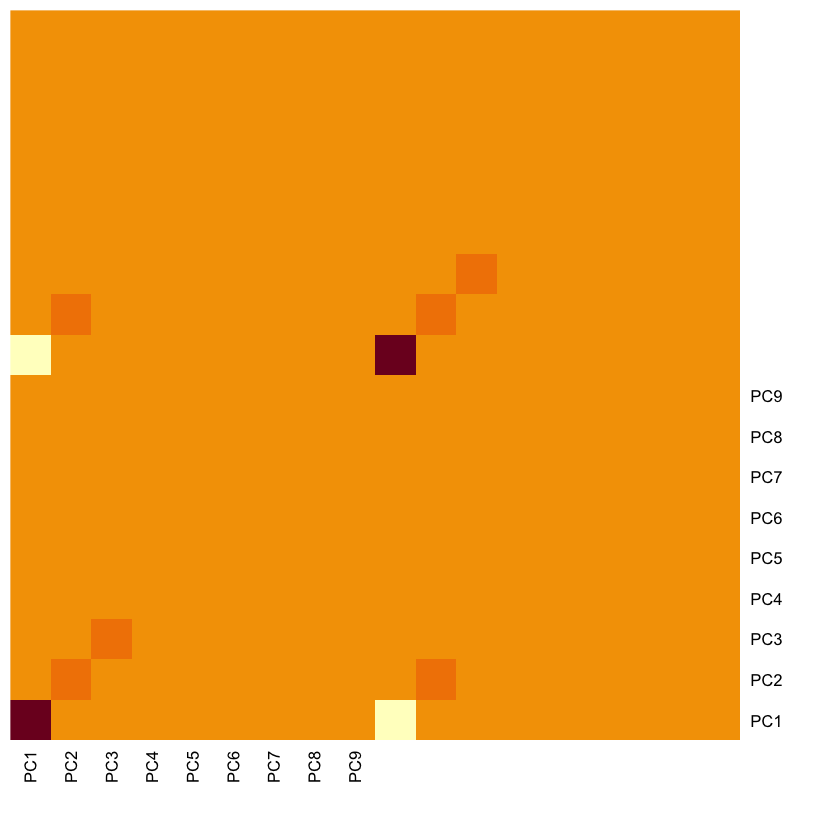

In [35]:
heatmap(cross_cov, Colv = NA, Rowv = NA, symm = TRUE)

In [36]:
cross_cov

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,,,,,,,,,
PC1,1.150491e-04,8.023806e-18,-8.145720e-18,-2.319919e-17,-8.249524e-18,-8.262600e-19,1.638103e-17,-2.850628e-17,-3.068278e-18,-1.070240e-04,-4.541138e-07,9.439344e-07,1.256016e-06,9.353449e-07,6.834788e-07,6.007011e-07,4.572574e-07,2.368018e-07
PC2,8.023806e-18,1.741281e-05,1.165337e-18,1.658429e-18,6.800568e-19,-2.604136e-20,-1.507314e-18,2.795220e-18,-2.965472e-19,-1.447819e-06,5.899165e-06,-1.841101e-07,-1.064559e-06,-7.812660e-07,-7.540079e-07,-4.971986e-07,-3.618552e-07,-8.327308e-08
PC3,-8.145720e-18,1.165337e-18,7.861264e-06,-1.068056e-19,-7.925724e-20,-6.565167e-20,6.551738e-19,-1.163602e-18,-7.134772e-20,-4.075304e-07,-1.034938e-06,-7.273422e-08,-2.342856e-07,2.137069e-09,2.180583e-07,1.569380e-07,1.754013e-07,7.505127e-08
PC4,-2.319919e-17,1.658429e-18,-1.068056e-19,3.195844e-06,1.007470e-18,-2.431981e-20,-8.523750e-19,1.511706e-18,6.245553e-20,-4.409370e-08,3.888526e-07,1.992563e-07,1.878427e-07,-1.428622e-07,-9.513485e-08,-1.757436e-07,-4.257131e-08,3.470204e-08
PC5,-8.249524e-18,6.800568e-19,-7.925724e-20,1.007470e-18,2.598002e-06,3.582527e-20,-2.067878e-19,4.532372e-19,-5.011129e-20,-2.351510e-07,-2.324522e-07,-4.339004e-08,-3.236157e-07,-3.295972e-08,1.371890e-08,-8.943157e-08,-9.842158e-08,-1.239191e-07
PC6,-8.262600e-19,-2.604136e-20,-6.565167e-20,-2.431981e-20,3.582527e-20,1.583603e-06,5.583291e-20,-5.867872e-20,8.610423e-21,-3.256862e-08,2.892355e-08,1.274976e-07,-2.550670e-08,-1.366016e-07,-4.516288e-08,2.196589e-09,5.512549e-08,2.581345e-08
PC7,1.638103e-17,-1.507314e-18,6.551738e-19,-8.523750e-19,-2.067878e-19,5.583291e-20,1.243494e-06,5.880149e-19,2.316122e-21,-7.050551e-08,2.902201e-07,-7.023222e-08,-2.221445e-07,-1.487833e-07,-1.110202e-07,-9.679067e-08,-1.060972e-08,2.954673e-08
PC8,-2.850628e-17,2.795220e-18,-1.163602e-18,1.511706e-18,4.532372e-19,-5.867872e-20,5.880149e-19,9.116018e-07,-4.546103e-20,1.074798e-07,4.174560e-08,2.444153e-07,2.402504e-07,2.214083e-07,1.612670e-07,7.211338e-08,3.258681e-08,-2.417452e-08
PC9,-3.068278e-18,-2.965472e-19,-7.134772e-20,6.245553e-20,-5.011129e-20,8.610423e-21,2.316122e-21,-4.546103e-20,2.099325e-07,-1.988369e-08,2.472604e-09,9.863526e-09,-1.044876e-08,8.263400e-09,-1.434579e-09,-6.410008e-09,-1.312015e-09,-6.886514e-08
,-1.070240e-04,-1.447819e-06,-4.075304e-07,-4.409370e-08,-2.351510e-07,-3.256862e-08,-7.050551e-08,1.074798e-07,-1.988369e-08,1.079221e-04,-6.966701e-07,-6.078278e-07,-5.987914e-07,-3.909094e-07,-2.691498e-07,-2.325786e-07,-2.226659e-07,-1.755732e-08


In [37]:
cross_corr = cov_to_cor(cross_cov);

In [38]:
sqrt(diag(as.matrix(cross_cov)));

PC1          PC2          PC3          PC4          PC5          PC6 
0.0107260964 0.0041728665 0.0028037946 0.0017876923 0.0016118319 0.0012584129 
         PC7          PC8          PC9                                        
0.0011151205 0.0009547784 0.0004581840 0.0103885563 0.0034942142 0.0022955892 
                                                                              
0.0018265582 0.0015076176 0.0012799139 0.0010709971 0.0008730864 0.0006518182

In [39]:
diag(as.matrix(cross_cov));

PC1          PC2          PC3          PC4          PC5          PC6 
1.150491e-04 1.741281e-05 7.861264e-06 3.195844e-06 2.598002e-06 1.583603e-06 
         PC7          PC8          PC9                                        
1.243494e-06 9.116018e-07 2.099325e-07 1.079221e-04 1.220953e-05 5.269730e-06 
                                                                              
3.336315e-06 2.272911e-06 1.638180e-06 1.147035e-06 7.622799e-07 4.248670e-07

In [40]:
dim(cross_cov)

[1] 18 18

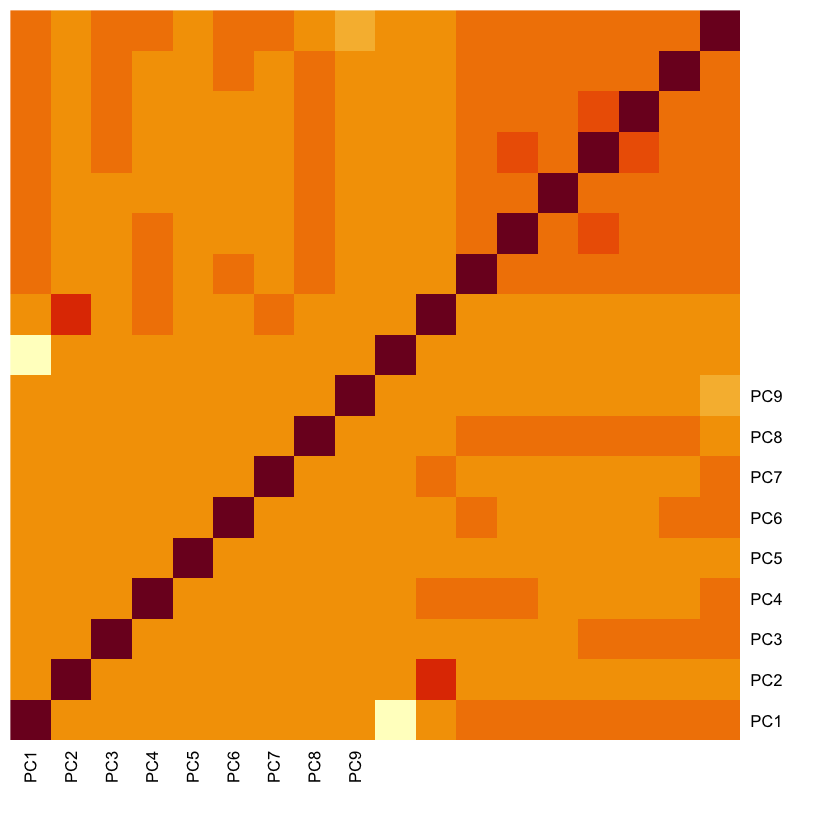

In [41]:
heatmap(cross_corr, Colv = NA, Rowv = NA, symm = TRUE)

In [ ]:
classical_pca, ewm_pca

In [42]:
sr = matrix(, 9, 2)

In [49]:
for (i in 1:9) {
    sr[i, 1] = mean(classical_pca[,i])/sd(classical_pca[,i]);
    sr[i, 2] = mean(ewm_pca[,i])/sd(ewm_pca[,i]);
}

In [50]:
sr

2.966701e-18,-0.0005669207
-3.096588e-18,0.0017135344
7.594366e-18,-0.0031170459
-5.659142e-18,0.0046967139
-6.476879e-18,0.0012904800
-9.124468e-19,-0.0004928436
2.671361e-18,0.0027717999
-7.679743e-18,0.0026866296
-9.870457e-17,-0.0037200219


In [47]:
srdiff = sr[,2] - sr[,1]

In [48]:
srdiff

[1] -0.0005669207  0.0017135344 -0.0031170459  0.0046967139  0.0012904800
[6] -0.0004928436  0.0027717999  0.0026866296 -0.0037200219